In [1]:
import numpy as np
from htm.bindings.encoders import ScalarEncoder, ScalarEncoderParameters
from htm.bindings.sdr import SDR
from htm.algorithms import SpatialPooler as SP
from htm.bindings.algorithms import Classifier

categories = {"cat":0, "dog":1, "monkey":2, "slow loris":3}

scalarEncoderParams = ScalarEncoderParameters()
scalarEncoderParams.minimum = 0
scalarEncoderParams.maximum = 4
scalarEncoderParams.activeBits = 3
scalarEncoderParams.category = True

enc = ScalarEncoder(scalarEncoderParams)

In [2]:
print ("cat = ", enc.encode(0))
print ("dog = ", enc.encode(1))
print ("monkey = ", enc.encode(2))
print ("slow loris =", enc.encode(3))

cat =  SDR( 15 ) 0, 1, 2
dog =  SDR( 15 ) 3, 4, 5
monkey =  SDR( 15 ) 6, 7, 8
slow loris = SDR( 15 ) 9, 10, 11


In [3]:
inputSDR  = SDR( dimensions = (15, ) )
activeSDR = SDR( dimensions = (256, ) )
sp = SP(inputDimensions  = inputSDR.dimensions,
        columnDimensions = activeSDR.dimensions,
        localAreaDensity = 0.02,
        globalInhibition = True,
        seed             = 1,
        synPermActiveInc   = 0.01,
        synPermInactiveDec = 0.008)

In [4]:
clsr = Classifier()

In [5]:
for i in range(3):
    for i in range(4):
        inputSDR=enc.encode(i)
        sp.compute(inputSDR, True, activeSDR)
        print("Active Outputs: ",activeSDR)
        clsr.learn( activeSDR, list(categories.values())[i]  )
        print("Classifier learn: ",list(categories)[i] )

Active Outputs:  SDR( 256 ) 63, 77, 118, 250, 255
Classifier learn:  cat
Active Outputs:  SDR( 256 ) 137, 165, 244, 245, 251
Classifier learn:  dog
Active Outputs:  SDR( 256 ) 9, 96, 97, 238, 243
Classifier learn:  monkey
Active Outputs:  SDR( 256 ) 96, 165, 171, 228, 253
Classifier learn:  slow loris
Active Outputs:  SDR( 256 ) 63, 77, 118, 250, 255
Classifier learn:  cat
Active Outputs:  SDR( 256 ) 137, 165, 244, 245, 251
Classifier learn:  dog
Active Outputs:  SDR( 256 ) 9, 96, 97, 238, 243
Classifier learn:  monkey
Active Outputs:  SDR( 256 ) 96, 165, 171, 228, 253
Classifier learn:  slow loris
Active Outputs:  SDR( 256 ) 63, 77, 118, 250, 255
Classifier learn:  cat
Active Outputs:  SDR( 256 ) 137, 165, 244, 245, 251
Classifier learn:  dog
Active Outputs:  SDR( 256 ) 9, 96, 97, 238, 243
Classifier learn:  monkey
Active Outputs:  SDR( 256 ) 96, 165, 171, 228, 253
Classifier learn:  slow loris


In [6]:
for i in range(4):
    inputSDR=enc.encode(i)
    sp.compute(inputSDR, False, activeSDR)
    print("Active Outputs: ",activeSDR)
    pdf = clsr.infer( activeSDR )
    print("PDF: ",pdf)
    predict = list(categories)[np.argmax( pdf )]  
    print("predict index: ",predict)

Active Outputs:  SDR( 256 ) 63, 77, 118, 250, 255
PDF:  [0.2518785027130525, 0.24937383014676484, 0.24937383014676484, 0.24937383014676484]
predict index:  cat
Active Outputs:  SDR( 256 ) 137, 165, 244, 245, 251
PDF:  [0.24856526094743583, 0.25231673621818224, 0.24918543343637248, 0.2499325495234888]
predict index:  dog
Active Outputs:  SDR( 256 ) 9, 96, 97, 238, 243
PDF:  [0.24877132557330714, 0.24877095409208877, 0.25252581263136004, 0.2499319034498316]
predict index:  monkey
Active Outputs:  SDR( 256 ) 96, 165, 171, 228, 253
PDF:  [0.24860665584475108, 0.2493507974568824, 0.2494747259161012, 0.25256782767186436]
predict index:  slow loris


In [7]:
catdog=[1,1,0,0,0,1,0,0,0,0,0,0,0,0,0]
inputSDR = SDR(dimensions = (15, ))
inputSDR.dense = np.array(catdog)
print(inputSDR)

SDR( 15 ) 0, 1, 5


In [8]:
sp.compute(inputSDR, False, activeSDR)
print("Active Outputs: ",activeSDR)
pdf = clsr.infer( activeSDR )
print("PDF: ",pdf)
predict = list(categories)[np.argmax( pdf )]  
print("predict index: ",predict)

Active Outputs:  SDR( 256 ) 0, 247, 250, 251, 255
PDF:  [0.2505001726916431, 0.25024948574883915, 0.24962526836366233, 0.24962508133300607]
predict index:  cat


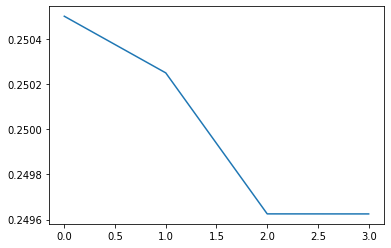

In [9]:
import matplotlib.pyplot as plt
plt.plot(clsr.infer( activeSDR ))
plt.show()